In [35]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data_url = '../dataset/force2020_data_unsupervised_learning.zip'
df = pd.read_csv(data_url, index_col='DEPTH_MD')

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.describe()

In [37]:
df.dropna(inplace=True)

In [ ]:
df.shape # 18270 - 12202 = 6068 ( it's a %33.2 missing data )

In [38]:
# Standardizing the data
scaler = StandardScaler()
df[['RHOB_T', 'NPHI_T', 'GR_T', 'DTC_T', 'PEF_T']] = scaler.fit_transform(df[['RHOB', 'NPHI', 'GR', 'DTC', 'PEF']])

In [39]:
def optimize_kmeans(data, max_k=10):
    inertia = []
    means = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        means.append(k)
        inertia.append(kmeans.inertia_)

    # generate the elbow plot
    fig = plt.figure(figsize=(10, 5))
    plt.plot(means, inertia, marker='o')
    plt.xlabel('Number of Clusters (k)', fontsize=14, fontweight='bold')
    plt.ylabel('Inertia', fontsize=14, fontweight='bold')
    plt.title('Elbow Method for Optimal k')
    plt.grid()
    plt.show()
    return inertia

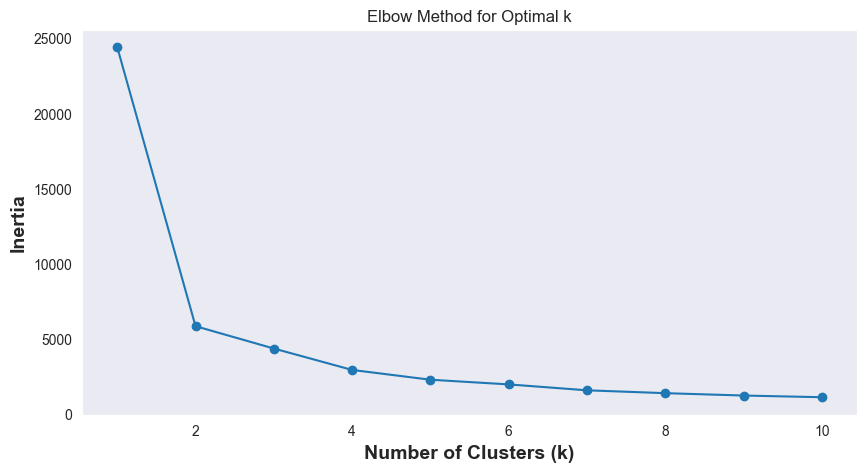

[24404.000000000004,
 5825.392818895275,
 4337.750384832758,
 2911.450494782116,
 2260.355534003713,
 1948.2902125017063,
 1555.0473938439623,
 1364.7077853929513,
 1206.9562358823027,
 1094.49269063487]

In [41]:
optimize_kmeans(df[['RHOB_T', 'NPHI_T']], max_k=10)

In [43]:
k_model = KMeans(n_clusters=3, random_state=42)

In [44]:
k_model.fit(df[['RHOB_T', 'NPHI_T']])

KMeans(n_clusters=3, random_state=42)

In [45]:
df['k_means_3'] = k_model.labels_

In [46]:
df.head(10)

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,NPHI_T,GR_T,DTC_T,PEF_T,k_means_3
DEPTH_MD,,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,2.523654,-0.179292,0.869531,-1.255364,2
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,2.770744,-0.010859,0.690042,-1.247886,2
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,2.524300,0.028875,0.554350,-1.247450,2
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,2.068584,-0.008126,0.585297,-1.261572,2
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,1.617342,-0.092056,0.752808,-1.325067,2
1139.464,1.762011,54.480759,0.588014,1.377215,150.236420,-1.541988,1.245981,-0.226514,0.948455,-1.395320,2
1139.616,1.693400,51.365631,0.563947,1.283025,156.456635,-1.814704,1.073092,-0.330693,1.153114,-1.447162,2
1139.768,1.636616,50.678062,0.582253,1.256915,162.392105,-2.040411,1.204599,-0.353688,1.348404,-1.461533,2
1139.920,1.619630,52.008244,0.603731,1.314987,163.404480,-2.107929,1.358895,-0.309202,1.381713,-1.429570,2


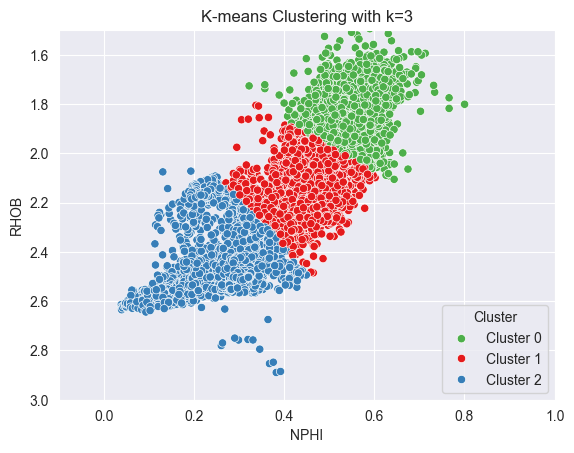

In [50]:
plot = sns.scatterplot(
    x=df['NPHI'],
    y=df['RHOB'],
    hue=df['k_means_3'],
    palette='Set1',
)

plot.set_xlim(-0.1, 1)
plot.set_ylim(3, 1.5)
plt.title('K-means Clustering with k=3')
plt.xlabel('NPHI')
plt.ylabel('RHOB')
plt.legend(title='Cluster', loc='lower right', labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

In [51]:
# create multiple clusters
for k in range(3, 11):
    k_model = KMeans(n_clusters=k, random_state=42)
    k_model.fit(df[['RHOB_T', 'NPHI_T']])
    df[f'k_means_{k}'] = k_model.labels_

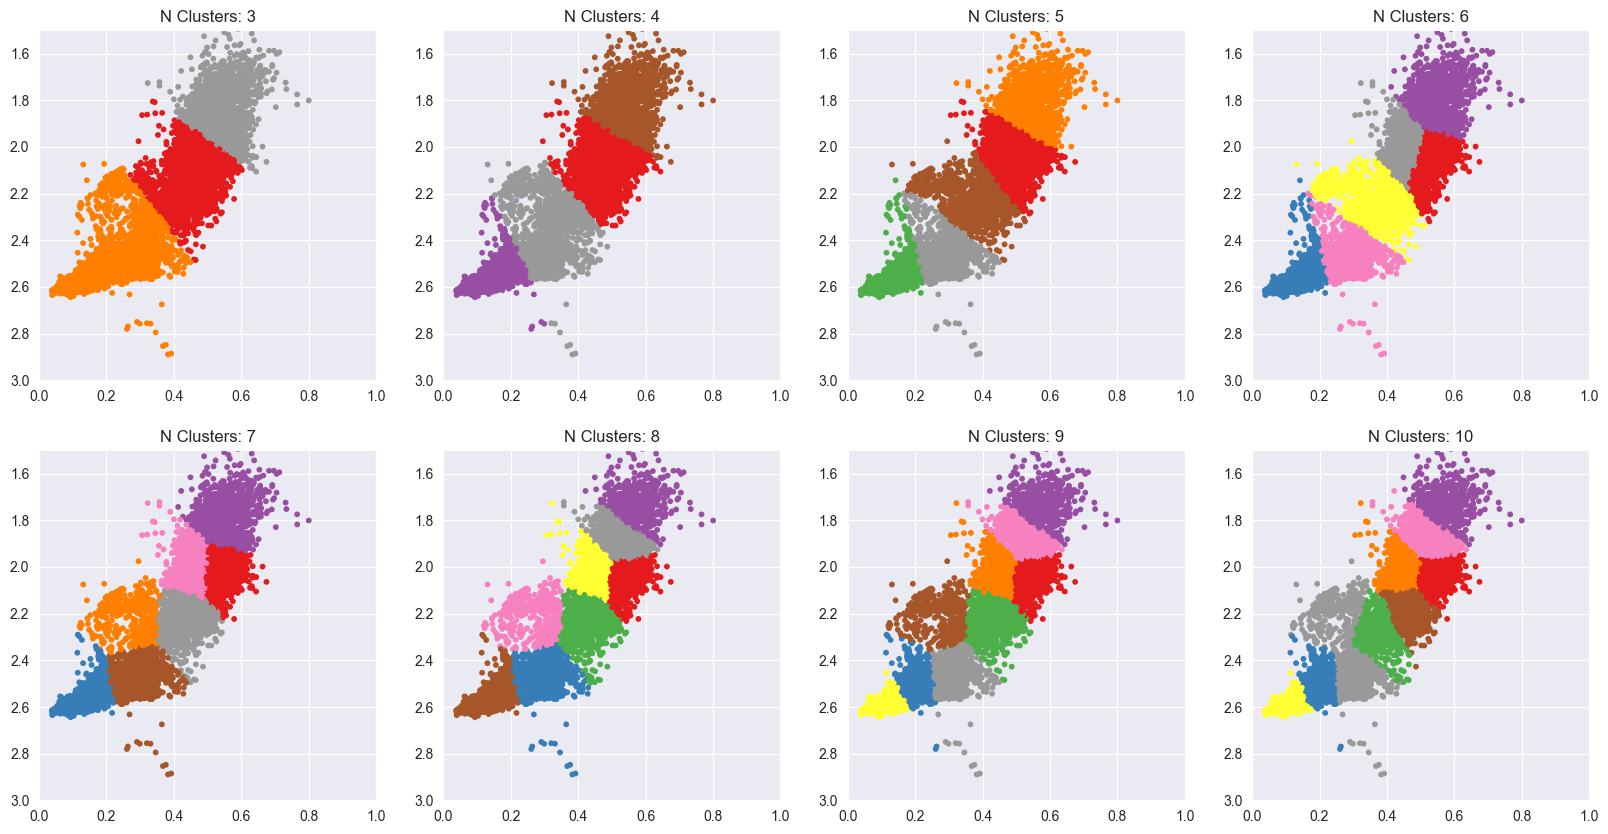

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(
        df['NPHI'], df['RHOB'], c=df[f'k_means_{i + 2}'], cmap='Set1', s=10
    )
    ax.set_xlim(0, 1)
    ax.set_ylim(3, 1.5)
    ax.set_title(f'N Clusters: {i + 2}')